In [ ]:
# install the library using the following code.
%pip install --force-reinstall https://github.com/SeewooLi/sldensity.git#egg=sldensity

In [2]:
import sldensity as sl
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# PRHL (proportional reversed hazard logistic) distribution

$$
f(X)=\frac{\alpha e^{-x}}{\left(1+e^{-x}\right)^{\alpha+1}}
$$

$$
F(X)=\left(1+e^{-x}\right)^{-\alpha}
$$

$$
f(X;\alpha,\mu,\lambda)=\frac{\alpha \lambda e^{-\lambda (x-\mu)}}{\left(1+e^{-\lambda (x-\mu)}\right)^{\alpha+1}}
$$

$$
F(X;\alpha,\mu,\lambda)=\left(1+e^{-\lambda (x-\mu)}\right)^{-\alpha}
$$

## **Digamma and poly-gamma functions**

$$
\begin{align}
\psi(x)&=\frac{d}{dx}\log{\Gamma(x)}   
&=\frac{\Gamma'(x)}{\Gamma(x)}   
&\approx\log{x}-\sum_{k=1}^{\infty}\frac{B_k}{kz^k}   
&\approx\log{x}-\frac{1}{2x}-\frac{1}{12x^2}+\cdots    
\
\end{align}
$$

   
$$
\psi^{(n)}(x)=\frac{d^n}{dx^n}\psi(x)    
\
$$

   
$$
\begin{align}
\psi'(x)&=\frac{d}{dx}\psi(x)    
&=\frac{\Gamma''(x)}{\Gamma(x)}-\left(\psi(x)\right)^2    
&\approx\sum_{k=0}^{\infty}\frac{B_k}{z^{k+1}}    
&\approx\frac{1}{z}+\frac{1}{2z^2}+\frac{1}{6z^3}+\cdots
\end{align}
$$

   
and

$$
\begin{align}
\psi''(x)&=\frac{d}{dx}\psi'(x)    
&=\frac{d}{dx}\left[\frac{\Gamma''(x)}{\Gamma(x)}-\left(\psi(x)\right)^2\right]    
&=\frac{\Gamma^{(3)}(x)}{\Gamma(x)}-3\psi'(x)\psi(x)-\left(\psi(x)\right)^3    
&\approx-\sum_{k=0}^{\infty}(k+1)\frac{B_k}{z^{k+2}}    
&\approx-\frac{1}{z^2}-\frac{1}{z^3}-\frac{1}{2z^4}+\cdots
\end{align}
$$

[Text(0.5, 1.0, 'Digamma'), (-10.0, 4.0), (0.0, 5.0)]

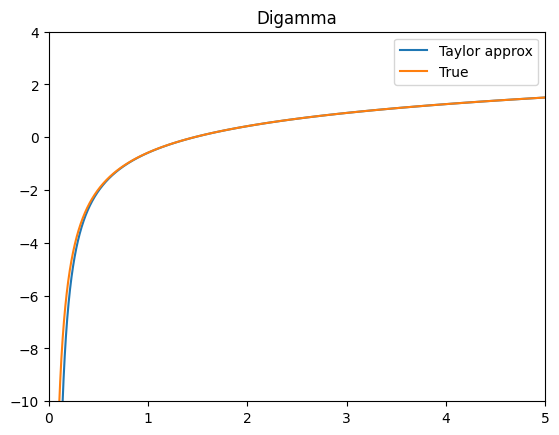

In [9]:
xxx=np.arange(0.001,5,0.001)
plot = sns.lineplot(
    x=xxx,
    y=np.log(xxx)-1/(2*xxx)-1/(12*xxx**2),
    label='Taylor approx'
)
plot = sns.lineplot(
    x=xxx,
    y=gms.digamma(xxx),
    label='True'
)
plot.set(title='Digamma',
         ylim=(-10,4),
        xlim=(0,5))

[Text(0.5, 1.0, 'Trigamma'), (0.0, 10.0), (0.0, 5.0)]

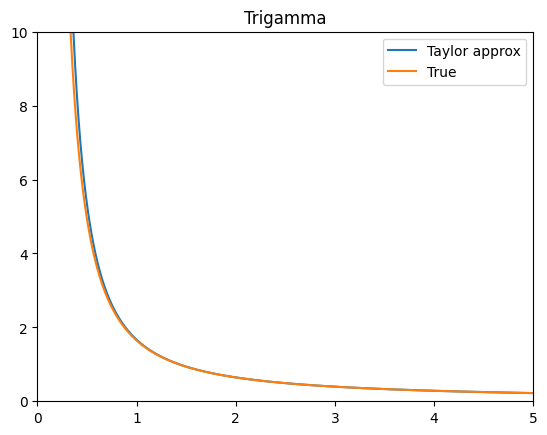

In [10]:
xxx=np.arange(0.001,5,0.001)
plot = sns.lineplot(
    x=xxx,
    y=1/xxx+1/(2*xxx**2)+1/(6*xxx**3),
    label='Taylor approx'
)
plot = sns.lineplot(
    x=xxx,
    y=gms.polygamma(1,np.arange(0.001,5,0.001)),
    label='True'
)
plot.set(title='Trigamma',
         ylim=(0,10),
        xlim=(0,5))

[Text(0.5, 1.0, 'Quadgamma'), (-20.0, 0.0), (0.0, 5.0)]

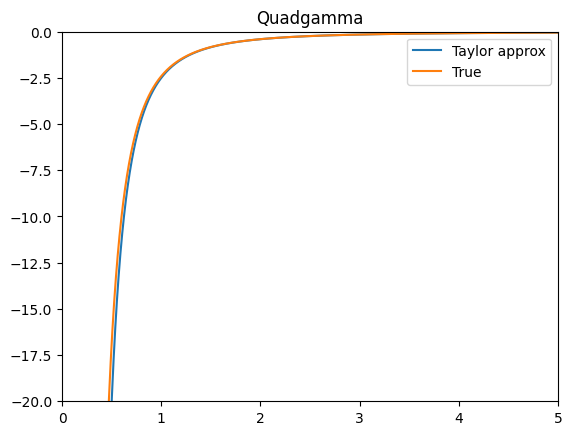

In [11]:
xxx=np.arange(0.001,5,0.001)
plot = sns.lineplot(
    x=xxx,
    y=-1/(xxx**2)-1/(xxx**3)-1/(2*xxx**4),
    label='Taylor approx'
)
plot = sns.lineplot(
    x=xxx,
    y=gms.polygamma(2,np.arange(0.001,5,0.001)),
    label='True'
)
plot.set(title='Quadgamma',
         ylim=(-20,0),
        xlim=(0,5))

## Mean and Variance of PRHL

### **MGF**

$$
\begin{align}
M_x(t)&=E(e^{tx})=\int_{-\infty}^{\infty}e^{tx}\frac{\alpha \lambda e^{-\lambda (x-\mu)}}{\left(1+e^{-\lambda (x-\mu)}\right)^{\alpha+1}}\,dx    
&=e^{t\mu}\frac{\Gamma\left(1-\frac{t}{\lambda}\right)\Gamma\left(\alpha+\frac{t}{\lambda}\right)}{\Gamma(\alpha)}
\end{align}
$$

Let, $u=\left(1+e^{-\lambda (x-\mu)}\right)^{-1}$.

Then, $\frac{du}{dx}=\frac{\lambda e^{-\lambda (x-\mu)}}{\left(1+e^{-\lambda (x-\mu)}\right)^{2}}$,

and

$$
\begin{align}
\frac{1-u}{u}&=e^{\lambda(x-\mu)}    
e^{-\lambda\mu}\left(\frac{1-u}{u}\right)&=e^{-\lambda x}    
\left[e^{-\lambda\mu}\left(\frac{1-u}{u}\right)\right]^{-\frac{t}{\lambda}}&=e^{tx}
\end{align}
$$

Therefore,

$$
\begin{align}
M_x(t)&=E(e^{tx})=\int_{0}^{1}\left[e^{-\lambda\mu}\left(\frac{1-u}{u}\right)\right]^{-\frac{t}{\lambda}}\frac{\alpha}{\left(1+e^{-\lambda (x-\mu)}\right)^{\alpha-1}}\,du    
&=\int_{0}^{1}\left[e^{-\lambda\mu}\left(\frac{1-u}{u}\right)\right]^{-\frac{t}{\lambda}}\alpha u^{\alpha-1}\,du    
&=\alpha e^{t\mu}\int_{0}^{1}(1-u)^{-\frac{t}{\lambda}}u^{\frac{t}{\lambda}} u^{\alpha-1}\,du    
&=\alpha e^{t\mu}\int_{0}^{1}(1-u)^{-\frac{t}{\lambda}}u^{\alpha+\frac{t}{\lambda}-1}\,du    
&=\alpha e^{t\mu} Beta\left(1-\frac{t}{\lambda},\, \alpha+\frac{t}{\lambda}\right)      
&=\alpha e^{t\mu}\frac{\Gamma\left(1-\frac{t}{\lambda}\right)\Gamma\left(\alpha+\frac{t}{\lambda}\right)}{\Gamma(\alpha+1)}    
&=e^{t\mu}\frac{\Gamma\left(1-\frac{t}{\lambda}\right)\Gamma\left(\alpha+\frac{t}{\lambda}\right)}{\Gamma(\alpha)}
\end{align}
$$

### **Moments**

$$
\begin{align}
M'_x(t)&=\mu M_x(t)+e^{t\mu}\left[\frac{\Gamma'\left(\alpha+\frac{t}{\lambda}\right)\Gamma\left(1-\frac{t}{\lambda}\right)}{\lambda\Gamma\left(\alpha\right)}-\frac{\Gamma\left(\alpha+\frac{t}{\lambda}\right)\Gamma'\left(1-\frac{t}{\lambda}\right)}{\lambda\Gamma\left(\alpha\right)}\right]
\end{align}    
$$



$$
\begin{align}
M''_x(t)&=\mu M'_x(t)    \\
&\qquad +\mu e^{t\mu}\left[\frac{\Gamma'\left(\alpha+\frac{t}{\lambda}\right)\Gamma\left(1-\frac{t}{\lambda}\right)}{\lambda\Gamma\left(\alpha\right)}-\frac{\Gamma\left(\alpha+\frac{t}{\lambda}\right)\Gamma'\left(1-\frac{t}{\lambda}\right)}{\lambda\Gamma\left(\alpha\right)}\right]    \\
&\qquad +e^{t\mu}\left[\frac{\Gamma''\left(\alpha+\frac{t}{\lambda}\right)\Gamma\left(1-\frac{t}{\lambda}\right)-\Gamma'\left(\alpha+\frac{t}{\lambda}\right)\Gamma'\left(1-\frac{t}{\lambda}\right)}{\lambda^2\Gamma\left(\alpha\right)}
-\frac{\Gamma'\left(\alpha+\frac{t}{\lambda}\right)\Gamma'\left(1-\frac{t}{\lambda}\right)-\Gamma\left(\alpha+\frac{t}{\lambda}\right)\Gamma''\left(1-\frac{t}{\lambda}\right)}{\lambda^2\Gamma\left(\alpha\right)}\right]
\end{align}
$$

and

$$
\begin{align}
M^{(3)}_x(t)&=\mu M''_x(t)    \\
&\qquad +\mu^2 e^{t\mu}\left[\frac{\Gamma'\left(\alpha+\frac{t}{\lambda}\right)\Gamma\left(1-\frac{t}{\lambda}\right)}{\lambda\Gamma\left(\alpha\right)}-\frac{\Gamma\left(\alpha+\frac{t}{\lambda}\right)\Gamma'\left(1-\frac{t}{\lambda}\right)}{\lambda\Gamma\left(\alpha\right)}\right]   \\ 
&\qquad +2\mu e^{t\mu}\left[\frac{\Gamma''\left(\alpha+\frac{t}{\lambda}\right)\Gamma\left(1-\frac{t}{\lambda}\right)-\Gamma'\left(\alpha+\frac{t}{\lambda}\right)\Gamma'\left(1-\frac{t}{\lambda}\right)}{\lambda^2\Gamma\left(\alpha\right)}
-\frac{\Gamma'\left(\alpha+\frac{t}{\lambda}\right)\Gamma'\left(1-\frac{t}{\lambda}\right)-\Gamma\left(\alpha+\frac{t}{\lambda}\right)\Gamma''\left(1-\frac{t}{\lambda}\right)}{\lambda^2\Gamma\left(\alpha\right)}\right]    \\
&\qquad +e^{t\mu}\left[\frac{\Gamma^{(3)}\left(\alpha+\frac{t}{\lambda}\right)\Gamma\left(1-\frac{t}{\lambda}\right)-3\Gamma''\left(\alpha+\frac{t}{\lambda}\right)\Gamma'\left(1-\frac{t}{\lambda}\right)}{\lambda^3 \Gamma(\alpha)}
+\frac{+3\Gamma'\left(\alpha+\frac{t}{\lambda}\right)\Gamma''\left(1-\frac{t}{\lambda}\right)-\Gamma\left(\alpha+\frac{t}{\lambda}\right)\Gamma^{(3)}\left(1-\frac{t}{\lambda}\right)}{\lambda^3 \Gamma(\alpha)}\right]
\end{align}
$$

### **Mean**

$$
\begin{align}
M'_x(0)=E(x)&=\mu M_x(0)+\frac{1}{\lambda}\left[\frac{\Gamma'(\alpha)}{\Gamma(\alpha)}-\frac{\Gamma'(1)}{\Gamma(1)}\right]    
&=\mu+\frac{1}{\lambda}\left[\psi(\alpha)-\psi(1)\right]    
&\approx\mu+\frac{1}{\lambda}\left[\log{\alpha}-\frac{1}{2\alpha}-\frac{1}{12\alpha^2}+0.57721\right]
\end{align}
$$

### $\bf{q^{\text{th}}}$ **quantile**

$$
Quantile(q)=\mu-\frac{1}{\lambda}\log{\left[q^{-\frac{1}{\alpha}}-1\right]}
$$

, where $0\le q\le1$.

### **Median**

$$
Med(x)=\mu-\frac{1}{\lambda}\log{\left[2^{\frac{1}{\alpha}}-1\right]}
$$

### **Variance**

$$
\begin{align}
M''_x(0)=E\left\(x^2\right\)&=\mu M'_x(0)+\frac{\mu}{\lambda}\left[\frac{\Gamma'(\alpha)}{\Gamma(\alpha)}-\frac{\Gamma'(1)}{\Gamma(1)}\right]    
&\qquad +\frac{1}{\lambda^2 \Gamma(\alpha)}\left[\Gamma''(\alpha)\Gamma(1)-2\Gamma'(\alpha)\Gamma'(1)+\Gamma(\alpha)\Gamma''(1)\right]    
&=\mu M'_x(0)+\frac{\mu}{\lambda}\left[\frac{\Gamma'(\alpha)}{\Gamma(\alpha)}-\frac{\Gamma'(1)}{\Gamma(1)}\right]    
&\qquad +\frac{1}{\lambda^2}\left[\frac{\Gamma''(\alpha)}{\Gamma(\alpha)}-\left\{\frac{\Gamma'(\alpha)}{\Gamma(\alpha)}\right\}^2+\frac{\Gamma''(1)}{\Gamma(1)}-\left\{\frac{\Gamma'(1)}{\Gamma(1)}\right\}^2\right]    
&\qquad +\frac{1}{\lambda^2}\left[\left\{\frac{\Gamma'(\alpha)}{\Gamma(\alpha)}\right\}^2-2\frac{\Gamma'(\alpha)}{\Gamma(\alpha)}\frac{\Gamma'(1)}{\Gamma(1)}+\left\{\frac{\Gamma'(1)}{\Gamma(1)}\right\}^2\right]    
&=\mu^2+2\frac{\mu}{\lambda}\left[\psi(\alpha)-\psi(1)\right]    
&\qquad +\frac{1}{\lambda^2}\left[\psi'(\alpha)+\psi'(1)\right]    
&\qquad +\frac{1}{\lambda^2}\left[\psi(\alpha)-\psi(1)\right]^2
\end{align}
$$

> Meanwhile, $\left[E(x)\right]^2$ is,

$$
\begin{align}
\left[E(x)\right]^2&=\left[M'_x(x)\right]^2    
&= \mu^2+2\frac{\mu}{\lambda}\left[\psi(\alpha)-\psi(1)\right]+\frac{1}{\lambda^2}\left[\psi(\alpha)-\psi(1)\right]^2
\end{align}
$$


Using $M''_x(0)$ and $\left[M'_x(x)\right]^2$,
$$
\begin{align}
\therefore Var(x) &=E\left(x^2\right)-\left[E(x)\right]^2    
&= M''_x(0)-\left[M'_x(x)\right]^2    
&=\frac{1}{\lambda^2}\left[\psi'(\alpha)+\psi'(1)\right]    
&\approx\frac{1}{\lambda^2}\left[\frac{1}{\alpha}+\frac{1}{2\alpha^2}+\frac{1}{6\alpha^3}+1.64493407\right]
\end{align}
$$


### **Skewness**

$$
\begin{align}
M^{(3)}_x(0)=E\left(x^3\right)&=\mu M''_x(0)+\frac{\mu^2}{\lambda}\left[\psi(\alpha)-\psi(1)\right]    
&\qquad +\frac{2\mu}{\lambda^2}\left[\left[\psi'(\alpha)+\psi'(1)\right]+\left[\psi(\alpha)-\psi(1)\right]^2\right]    
&\qquad +\frac{1}{\lambda^3}\left[\frac{\Gamma^{(3)}(\alpha)}{\Gamma(\alpha)}-\frac{\Gamma^{(3)}(1)}{\Gamma(1)}\right]    
&\qquad -\frac{1}{\lambda^3}\left[3\psi'(\alpha)\psi(1)-3\psi(\alpha)\psi'(1)\right]    
&\qquad -\frac{1}{\lambda^3}\left[3\psi(\alpha)^2\psi(1)-3\psi(\alpha)\psi(1)^2\right]    
&=\mu^3+\frac{3\mu^2}{\lambda}\left[\psi(\alpha)-\psi(1)\right]    
&\qquad +\frac{3\mu}{\lambda^2}\left[\left[\psi'(\alpha)+\psi'(1)\right]+\left[\psi(\alpha)-\psi(1)\right]^2\right]    
&\qquad +\frac{1}{\lambda^3}\left[\frac{\Gamma^{(3)}(\alpha)}{\Gamma(\alpha)}-\frac{\Gamma^{(3)}(1)}{\Gamma(1)}\right]    
&\qquad -\frac{1}{\lambda^3}\left[3\psi'(\alpha)\psi(1)-3\psi(\alpha)\psi'(1)\right]    
&\qquad -\frac{1}{\lambda^3}\left[3\psi(\alpha)^2\psi(1)-3\psi(\alpha)\psi(1)^2\right]
\end{align}
$$

> Meanwhile, $\left[E(x)\right]^3$ is,

$$
\begin{align}
\left[E(x)\right]^2&=\left[M'_x(x)\right]^3    
&=\mu^3+\frac{3\mu^2}{\lambda}\left[\psi(\alpha)-\psi(1)\right]    
&\qquad +\frac{3\mu}{\lambda^2}\left[\psi(\alpha)-\psi(1)\right]^2 + \frac{1}{\lambda^3}\left[\psi(\alpha)-\psi(1)\right]^3    
\end{align}      
$$

, and $3E(x)Var(x)$ is,

$$
\begin{align}
3E(x)Var(x)&=\frac{3\mu}{\lambda^2}\left[\psi'(\alpha)+\psi'(1)\right]    
&\qquad +\frac{3}{\lambda^3}\left[\psi'(\alpha)+\psi'(1)\right]\left[\psi(\alpha)-\psi(1)\right]
\end{align}
$$

$$
\begin{align}
Var(x)^{\frac{3}{2}}Skew(x)&=E\left[\left(x-E(x)\right)^3\right]=E\left(x^3\right)-3E(x)Var(x)-E(x)^3    
&=M^{(3)}_x(0)-3Mean(x)Var(x)-Mean(x)^3    
&=\frac{1}{\lambda^3}\left[\frac{\Gamma^{(3)}(\alpha)}{\Gamma(\alpha)}-\frac{\Gamma^{(3)}(1)}{\Gamma(1)}\right]    
&\qquad -\frac{1}{\lambda^3}\left[3\psi'(\alpha)\psi(1)-3\psi(\alpha)\psi'(1)\right]    
&\qquad -\frac{1}{\lambda^3}\left[3\psi(\alpha)^2\psi(1)-3\psi(\alpha)\psi(1)^2\right]      
&\qquad -\frac{1}{\lambda^3}\left[\psi(\alpha)-\psi(1)\right]^3-\frac{3}{\lambda^3}\left[\psi'(\alpha)+\psi'(1)\right]\left[\psi(\alpha)-\psi(1)\right]    
&=\frac{1}{\lambda^3}\left[\frac{\Gamma^{(3)}(\alpha)}{\Gamma(\alpha)}-\frac{\Gamma^{(3)}(1)}{\Gamma(1)}\right]    
&\qquad -\frac{1}{\lambda^3}\left[\psi(\alpha)^3-\psi(1)^3\right]-\frac{3}{\lambda^3}\left[\psi'(\alpha)\psi(\alpha)-\psi'(1)\psi(1)\right]    
&=\frac{1}{\lambda^3}\left[\psi''(\alpha)-\psi''(1)\right]    
&\approx-\frac{1}{\lambda^3}\left[\frac{1}{\alpha^2}+\frac{1}{\alpha^3}+\frac{1}{2\alpha^4}-2.40411381\right]
\end{align}
$$

$$
\therefore
\begin{align}
Skew(x)&=\frac{\left[\psi''(\alpha)-\psi''(1)\right]}{\left[\psi'(\alpha)+\psi'(1)\right]^{\frac{3}{2}}}    
&\approx -\frac{\frac{1}{\alpha^2}+\frac{1}{\alpha^3}+\frac{1}{2\alpha^4}-2.40411381}{\left[\frac{1}{\alpha}+\frac{1}{2\alpha^2}+\frac{1}{6\alpha^3}+1.64493407\right]^{\frac{3}{2}}}
\end{align}
$$

# Estimation for ($\alpha$, $\mu$, $\lambda$)

Letting $\zeta$ refer to the skewness of PRHL distribution,   
the skewness parameter $\alpha$ can be estimated approximately by finding a solution of the following equation in which a numerical method (e.g., Newton-Raphson method) can be used

$$
\zeta \left[\frac{1}{\alpha}+\frac{1}{2\alpha^2}+\frac{1}{6\alpha^3}+1.64493407\right]^{\frac{3}{2}}+\frac{1}{\alpha^2}+\frac{1}{\alpha^3}+\frac{1}{2\alpha^4}-2.40411381=0,
$$

or, equivalently, without asymptotic approximation,

$$
\zeta\left[\psi'(\alpha)+\psi'(1)\right]^{\frac{3}{2}}-\left[\psi''(\alpha)-\psi''(1)\right]=0
$$


## Newton-Raphson method for the estimation of $\alpha$

* without asymtotic approximation

Let $f(\alpha)=\zeta\left[\psi'(\alpha)+\psi'(1)\right]-\left[\psi''(\alpha)-\psi''(1)\right]$.



$$
\begin{align}
f'(\alpha)&=\frac{d}{d\alpha}f(\alpha)    
&=\psi''(\alpha)\frac{3\zeta}{2}\left[\psi'(\alpha)+\psi'(1)\right]^{\frac{1}{2}}-\psi^{(3)}(\alpha)
\end{align}
$$

* with asymtotic approximation

Let $f(\alpha)=\zeta \left[\frac{1}{\alpha}+\frac{1}{2\alpha^2}+\frac{1}{6\alpha^3}+1.64493407\right]^{\frac{3}{2}}+\frac{1}{\alpha^2}+\frac{1}{\alpha^3}+\frac{1}{2\alpha^4}-2.40411381$.


$$
\begin{align}
f'(\alpha)&=\frac{d}{d\alpha}f(\alpha)    
&=-\zeta\frac{3}{2} \left(\frac{1}{\alpha}+\frac{1}{2\alpha^2}+\frac{1}{6\alpha^3}+1.64493407\right)^{\frac{1}{2}}\left(\frac{1}{\alpha^2}+\frac{1}{\alpha^3}+\frac{1}{2\alpha^4}\right)    
&\quad -\left(\frac{2}{\alpha^3}+\frac{3}{\alpha^4}+\frac{2}{\alpha^5}\right)
\end{align}
$$

 
* If, we are to update from $\alpha^{(t)}$ to $\alpha^{(t+1)}$,   
the following Newton-Raphson equation can be used for the updating:

$$
\alpha^{(t+1)} = \alpha^{(t)} - \frac{f(\alpha^{(t)})}{f'(\alpha^{(t)})}
$$

## Estimation of $\lambda$

$$
\hat{\lambda}=\sqrt{\frac{\psi'(\alpha)+\psi'(1)}{s^2}}
$$

, where $s^2$ is the sample variance.

## Estimation of $\mu$

$$
\hat{\mu}=\bar{x}-\frac{1}{\lambda}\left[\psi(\alpha)-\psi(1)\right]
$$

, where $\bar{x}$ is the sample mean.

---
## Arguments (common for all functions)

* Parameters
    * `a` - Parameter $\alpha$.
    * `m` - Parameter $\mu$.
    * `l` - Parameter $\lambda$.

<br>

* Data
    * `x` - `bias_idx_num`.
    * `df` - A dataframe containing `bias_idx_num` & `cell_cnt`.   

<br>

* Others
    * `n` - The number of samples to be drawn.
    * `q` - The cumulative probability (0 < $q$ < 1).

---
    

## Functions

### PRHL

* `dPRHL(x, a, m, l)` : PDF of PRHL.
    * Returns \
        `pdf` - The evaluation(s) of PDF at `x`.

<br>

* `cPRHL(x, a, m, l)` : CDF of PRHL.
    * Returns \
        `cdf` - The evaluation(s) of CDF at `x`.

<br>

* `qPRHL(q, a, m, l)` : Inverse-CDF of PRHL.
    * Returns \
        `quantile` - The $q^{\text{th}}$ quantile.

<br>

* `rPRHL(n, a, m, l)` : Random sampling from PRHL.
    * Returns \
        `samples` - Total `n` samples drawn from $PRHL(\alpha, \, \mu, \, \lambda)$.

<br>

* `estPRHL(df)` : Parameter estimation for PRHL distribution parameters (i.e., $\alpha, \, \mu, \,\text{and}\, \lambda$).
    * Returns \
        `a` - Parameter $\alpha$, \
        `m` - Parameter $\mu$, \
        `l` - Parameter $\lambda$, \
        `skew` - Skewness of the density.
        
<br>
        
* `moments_df(df)` : Mean, variance, and skewness for a dataset.
    * Returns \
        `mean` - Mean of the data, \
        `var` - Variance of the data, \
        `skew` - Skewness of the data.
    
<br>

* `moments_pdf(a, m, l)` : Mean, variance, and skewness for a $PRHL(\alpha, \, \mu, \,  \lambda)$.
    * Returns \
        `mean` - Mean of the data, \
        `var` - Variance of the data, \
        `skew` - Skewness of the data.

<br>

* `a_to_sigma(a)` : Transition of $\alpha$ to $\sigma_{section 0}$ & $\sigma_{section 1}$ for the approximation of half-Gaussian to PRHL.
    * Returns \
        `mean` - Mean of the data, \
        `var` - Variance of the data, \
        `skew` - Skewness of the data.

<br>

### MPRHL

* `dPRHLM(x, a, m, l)` : PDF of PRHL.\
    * Returens \
        `pdf` - The evaluation(s) of PDF at `x`.
        
<br>

* `estPRHLM(df, a, m, l)` : Parameter estimation for MPRHL distribution parameters (i.e., vectors of $\alpha, \, \mu, \,\text{and}\, \lambda$).
    * Returns \
        `a` - Parameter $\alpha$, \
        `m` - Parameter $\mu$, \
        `l` - Parameter $\lambda$, \
        `skew` - Skewness of the density.
        
---

## Examples

In [3]:
x = np.arange(-5,10,0.01)
a = 2
m = 0
l = 1
df = pd.read_csv('sample1.csv', index_col=False)
df.rename(columns={"x":"x_axis"}, inplace=True)
df.head(4)

,x_axis,freq
0,-3.5,8
1,-3.3,10
2,-3.1,24
3,-2.9,38


### `dPRHL`

<Axes: >

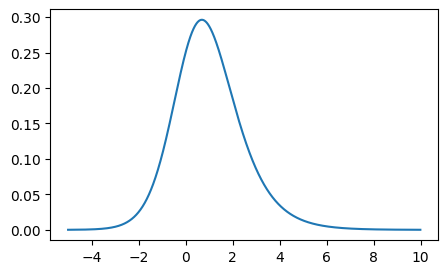

In [4]:
plt.figure(figsize=[5,3])
sns.lineplot(
    x=x,
    y=sl.dPRHL(x, a, m, l)
)

### `cPRHL`

<Axes: >

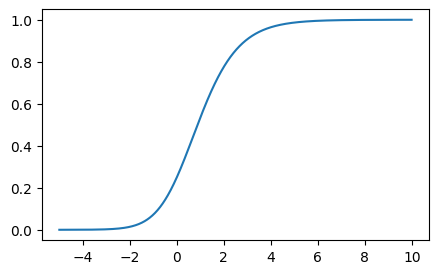

In [5]:
plt.figure(figsize=[5,3])
sns.lineplot(
    x=x,
    y=sl.cPRHL(x, a, m, l)
)

### `qPRHL`

<Axes: >

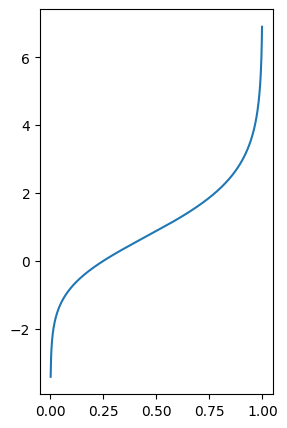

In [6]:
plt.figure(figsize=[3,5])
xx = np.arange(0.001,.999,0.001)
sns.lineplot(x=xx,
            y=sl.qPRHL(xx,a,m,l)
            )

### `rPRHL`

<Axes: ylabel='Density'>

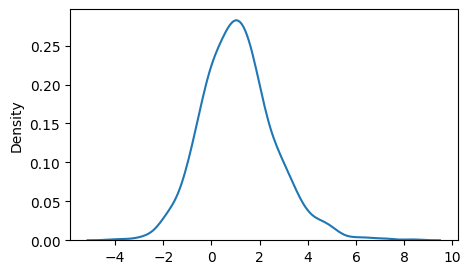

In [7]:
plt.figure(figsize=[5,3])
sns.kdeplot(
    x=sl.rPRHL(1000, a, m, l)
)

### `estPRHL`

In [9]:
a, m, l, mean, var, skew, median = sl.estPRHL(df)
print('alpha    = ', a)
print('mu       = ', m)
print('lambda   = ', l)
print('skewness = ', skew)

alpha    =  1.1779303049503533
mu       =  -0.5954290486712298
lambda   =  1.8296874364894604
skewness =  0.1684985336778425


### `moments_df`

In [12]:
mean,var,sk = sl.moments_df(df)
print('mean     = ', mean)
print('variance = ', var)
print('skewness = ', sk)

mean     =  -0.4534161214225308
variance =  1.0558977287998301
skewness =  0.12818117750263655


### `moments_pdf`



In [11]:
mean,var,sk = sl.moments_pdf(a, m, l)
print('mean     = ', mean)
print('variance = ', var)
print('skewness = ', sk)

mean     =  -0.4534161214225308
variance =  0.8799147739998586
skewness =  0.16849853367784254
